# Vignette

Example workflow to convert CITESeq data to FCS file format.

This example used to 5k PBMC NextGEM dataset from 10X.

Download data from: http://cf.10xgenomics.com/samples/cell-exp/3.1.0/5k_pbmc_protein_v3_nextgem/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5

In [1]:
import os

import scanpy as sc

from anndata_fcs import anndata_to_fcs, fcs_to_anndata, fcs_to_dataframe, gate_polygon, scatter, gate_polygon_subset

### Load anndata object from rawdata

In [2]:
adata = sc.read_10x_h5(
    filename=os.path.join(os.getcwd(), "..", "..", "data", "5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5"),
    gex_only=False,
)
adata.var_names_make_unique()

/home/malte/Dokumente/Github/citeseq_to_fcs/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


### Filter CITESeq data

In [3]:
adata_citeseq = adata[:, adata.var["feature_types"] == "Antibody Capture"]
adata_citeseq

View of AnnData object with n_obs × n_vars = 5527 × 32
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

### Generate FCS file

In [4]:
# Convert data
fcs_data = anndata_to_fcs(adata_citeseq)

In [5]:
adata_citeseq.obs.head()

,barcode_rank
AAACCCACAGGCTTGC-1,0
AAACCCAGTAGTTAGA-1,1
AAACGAAGTAACGATA-1,2
AAACGAAGTGGATCAG-1,3
AAACGAATCATGAGAA-1,4


In [6]:
# Save fcs file
fcs_data.write_fcs(os.path.join(os.getcwd(), "..", "..", "data", "citeseq.fcs"))

In [7]:
fcs_df = fcs_to_dataframe(fcs_data)
fcs_df.head()

,CD3_TotalSeqB,CD4_TotalSeqB,CD8a_TotalSeqB,CD11b_TotalSeqB,CD14_TotalSeqB,CD15_TotalSeqB,CD16_TotalSeqB,CD19_TotalSeqB,CD20_TotalSeqB,CD25_TotalSeqB,...,CD274_TotalSeqB,CD278_TotalSeqB,CD335_TotalSeqB,PD-1_TotalSeqB,HLA-DR_TotalSeqB,TIGIT_TotalSeqB,IgG1_control_TotalSeqB,IgG2a_control_TotalSeqB,IgG2b_control_TotalSeqB,barcode_rank
0,12.0,280.0,9.0,3122.0,746.0,9.0,1.0,5.0,2.0,4.0,...,2.0,6.0,8.0,4.0,101.0,4.0,5.0,2.0,4.0,0.0
1,24.0,231.0,11.0,1241.0,355.0,10.0,2.0,4.0,11.0,5.0,...,1.0,4.0,8.0,8.0,1450.0,5.0,0.0,1.0,1.0,1.0
2,23.0,117.0,3.0,582.0,133.0,7.0,4.0,1.0,7.0,3.0,...,4.0,5.0,2.0,2.0,524.0,2.0,1.0,4.0,2.0,2.0
3,8.0,83.0,1.0,1966.0,675.0,7.0,2.0,3.0,8.0,3.0,...,3.0,2.0,2.0,5.0,216.0,0.0,5.0,1.0,3.0,3.0
4,726.0,1100.0,5.0,14.0,13.0,6.0,2.0,7.0,6.0,11.0,...,2.0,129.0,4.0,5.0,9.0,5.0,1.0,3.0,4.0,4.0


### Gating on FCS file

In [8]:
in_polygon = gate_polygon(
    fcs_data,
    x="CD3_TotalSeqB",
    y="CD4_TotalSeqB",
    polygon=[[90, 200], [5000, 200], [5000, 5000], [90, 5000]],
)

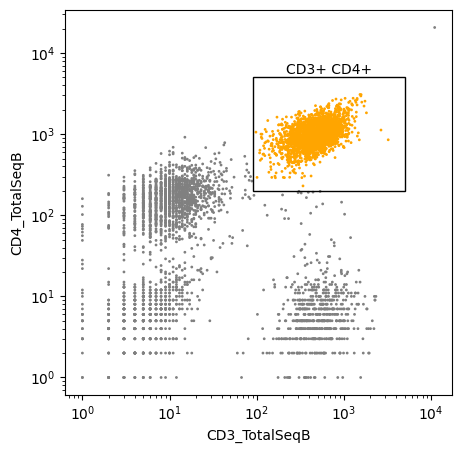

In [9]:
ax = scatter(
    data=fcs_df,
    x="CD3_TotalSeqB",
    y="CD4_TotalSeqB",
    gates={"CD3+ CD4+": [[90, 200], [5000, 200], [5000, 5000], [90, 5000]]},
    highlight=in_polygon,
    highlight_color="orange",
    color="gray",
)

In [10]:
fcs_to_dataframe(
    gate_polygon_subset(
        fcs_data,
        x="CD3_TotalSeqB",
        y="CD4_TotalSeqB",
        polygon=[[90, 200], [5000, 200], [5000, 5000], [90, 5000]],
    )
).head()

,CD3_TotalSeqB,CD4_TotalSeqB,CD8a_TotalSeqB,CD11b_TotalSeqB,CD14_TotalSeqB,CD15_TotalSeqB,CD16_TotalSeqB,CD19_TotalSeqB,CD20_TotalSeqB,CD25_TotalSeqB,...,CD274_TotalSeqB,CD278_TotalSeqB,CD335_TotalSeqB,PD-1_TotalSeqB,HLA-DR_TotalSeqB,TIGIT_TotalSeqB,IgG1_control_TotalSeqB,IgG2a_control_TotalSeqB,IgG2b_control_TotalSeqB,barcode_rank
0,726.0,1100.0,5.0,14.0,13.0,6.0,2.0,7.0,6.0,11.0,...,2.0,129.0,4.0,5.0,9.0,5.0,1.0,3.0,4.0,4.0
1,342.0,1086.0,2.0,9.0,10.0,4.0,1.0,3.0,7.0,11.0,...,5.0,44.0,3.0,5.0,14.0,12.0,0.0,2.0,4.0,5.0
2,125.0,1144.0,1.0,26.0,8.0,8.0,2.0,2.0,5.0,17.0,...,4.0,36.0,0.0,4.0,11.0,2.0,3.0,2.0,1.0,7.0
3,538.0,1065.0,3.0,11.0,15.0,5.0,3.0,2.0,6.0,2.0,...,3.0,44.0,2.0,12.0,9.0,0.0,3.0,0.0,1.0,9.0
4,224.0,531.0,1.0,11.0,4.0,2.0,2.0,2.0,1.0,12.0,...,0.0,14.0,1.0,2.0,9.0,2.0,1.0,1.0,4.0,10.0


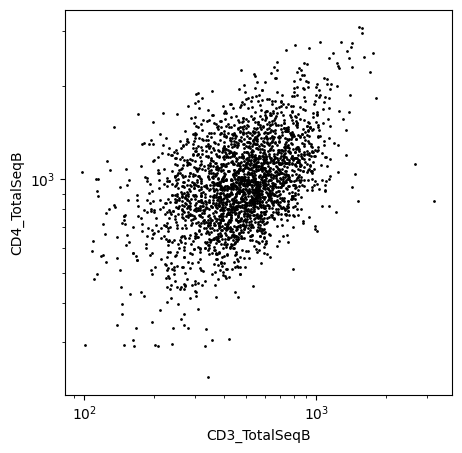

In [11]:
ax = scatter(
    data=fcs_to_dataframe(
        gate_polygon_subset(
            fcs_data,
            x="CD3_TotalSeqB",
            y="CD4_TotalSeqB",
            polygon=[[90, 200], [5000, 200], [5000, 5000], [90, 5000]],
        )
    ),
    x="CD3_TotalSeqB",
    y="CD4_TotalSeqB",
)

### Recover anndata from gated FCS file

In [12]:
adata_output = fcs_to_anndata(
    gate_polygon_subset(
        fcs_data,
        x="CD3_TotalSeqB",
        y="CD4_TotalSeqB",
        polygon=[[90, 200], [5000, 200], [5000, 5000], [90, 5000]],
    ),
    include_metadata=False,
)
adata_output

AnnData object with n_obs × n_vars = 2581 × 33

In [13]:
adata_citeseq[adata_citeseq.obs["barcode_rank"].isin(adata_output[:, ["barcode_rank"]].X.flatten()), :]

View of AnnData object with n_obs × n_vars = 2581 × 32
    obs: 'barcode_rank'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'